<a href="https://colab.research.google.com/github/SREERAM9652/SCT_DS_4/blob/main/SCT_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing traffic accident data involves several steps, including data preprocessing, exploratory data analysis (EDA), and visualization. To help you analyze traffic accident data, identify patterns related to road conditions, weather, and time of day, and visualize accident hotspots and contributing factors.

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Real-Time_Traffic_Incident_Reports.csv to Real-Time_Traffic_Incident_Reports.csv


In [ ]:
file_path = 'Real-Time_Traffic_Incident_Reports.csv'


Load the Dataset with Specified Data Types

In [ ]:
import pandas as pd

# Define the data types for each column to avoid dtype warnings
dtype_spec = {
    'Traffic Report ID': str,
    'Published Date': str,
    'Issue Reported': str,
    'Location': str,
    'Latitude': float,
    'Longitude': float,
    'Address': str,
    'Status': str,
    'Status Date': str
}

# Load the dataset
file_path = 'Real-Time_Traffic_Incident_Reports.csv'
df = pd.read_csv(file_path, dtype=dtype_spec, parse_dates=['Published Date', 'Status Date'])

# Display the first few rows
print(df.head())


  Traffic Report ID            Published Date  Issue Reported  \
0                A1 2018-06-13 06:35:59+00:00   Crash Service   
1                A2 2018-06-13 10:15:36+00:00  Traffic Hazard   
2                A3 2020-04-17 21:25:03+00:00    Crash Urgent   
3                A4 2020-04-17 21:40:52+00:00  Traffic Hazard   
4                A5 2020-04-17 21:00:55+00:00    Crash Urgent   

                 Location   Latitude  Longitude  \
0  (30.283797,-97.741906)  30.283797 -97.741906   
1  (30.339593,-97.700963)  30.339593 -97.700963   
2  (30.329455,-97.638105)  30.329455 -97.638105   
3  (30.202806,-97.760701)  30.202806 -97.760701   
4  (30.184265,-97.687339)  30.184265 -97.687339   

                                       Address    Status  \
0                     W 21ST ST & GUADALUPE ST  ARCHIVED   
1                     400-717 E ANDERSON LN EB  ARCHIVED   
2  E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD  ARCHIVED   
3                          5300-blk S Ih 35 Sb  ARCHIVED   
4 

Preprocess Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Load the dataset
file_path = 'Real-Time_Traffic_Incident_Reports.csv'
dtype_spec = {
    'Traffic Report ID': str,
    'Published Date': str,
    'Issue Reported': str,
    'Location': str,
    'Latitude': float,
    'Longitude': float,
    'Address': str,
    'Status': str,
    'Status Date': str
}
df = pd.read_csv(file_path, dtype=dtype_spec, parse_dates=['Published Date', 'Status Date'])

# Convert datetime columns
df['Published Date'] = pd.to_datetime(df['Published Date'])
df['Status Date'] = pd.to_datetime(df['Status Date'])

# Extract hour and day of week
df['Hour'] = df['Published Date'].dt.hour
df['Day_of_Week'] = df['Published Date'].dt.day_name()

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Latitude', 'Longitude'])

# Display summary information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Traffic Report ID  3999 non-null   object             
 1   Published Date     3999 non-null   datetime64[ns, UTC]
 2   Issue Reported     3999 non-null   object             
 3   Location           3993 non-null   object             
 4   Latitude           3999 non-null   float64            
 5   Longitude          3999 non-null   float64            
 6   Address            3999 non-null   object             
 7   Status             3999 non-null   object             
 8   Status Date        3999 non-null   datetime64[ns, UTC]
 9   Hour               3999 non-null   float64            
 10  Day_of_Week        3999 non-null   object             
dtypes: datetime64[ns, UTC](2), float64(3), object(6)
memory usage: 374.9+ KB
None


Perform EDA

Distribution of Incidents by Hour

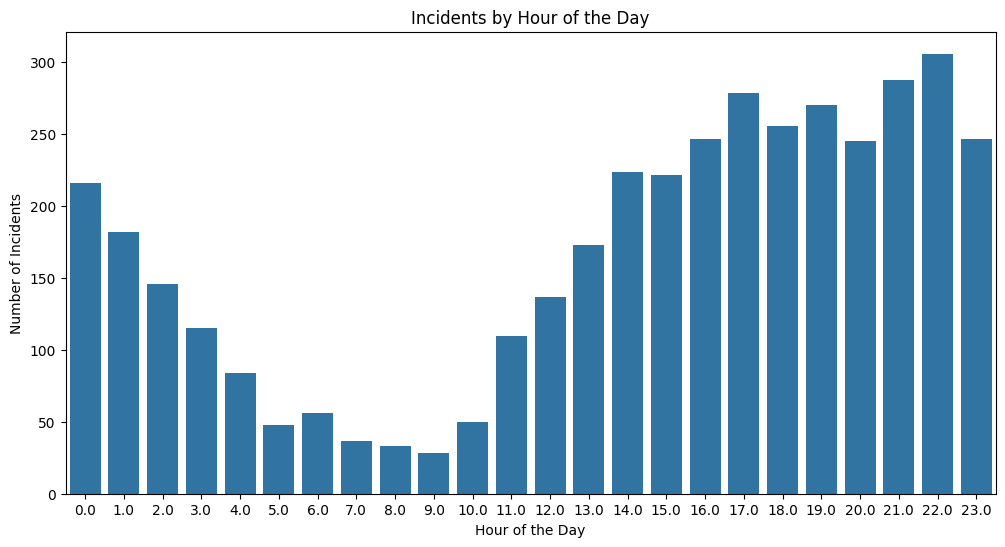

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Incidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.show()


Distribution of Incidents by Day of the Week

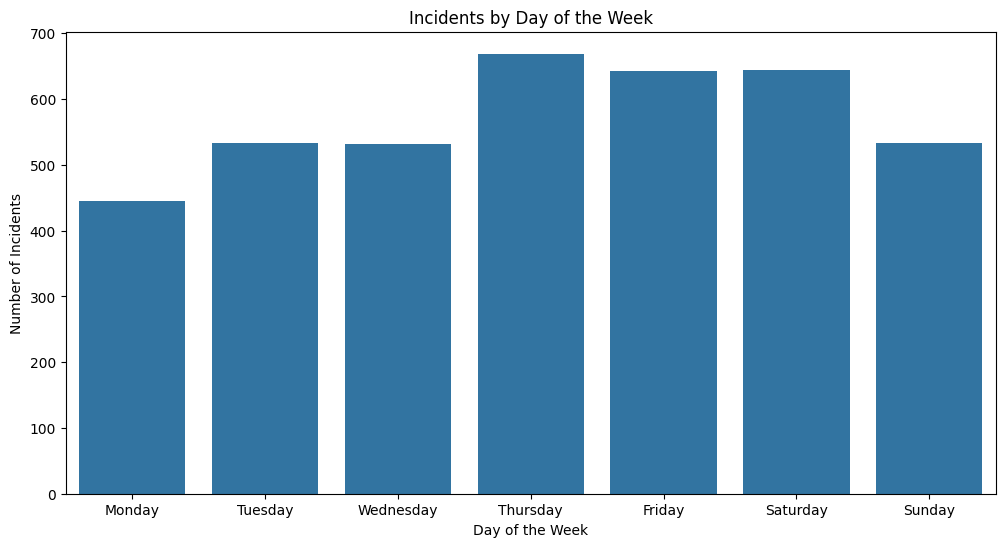

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()


Types of Incidents


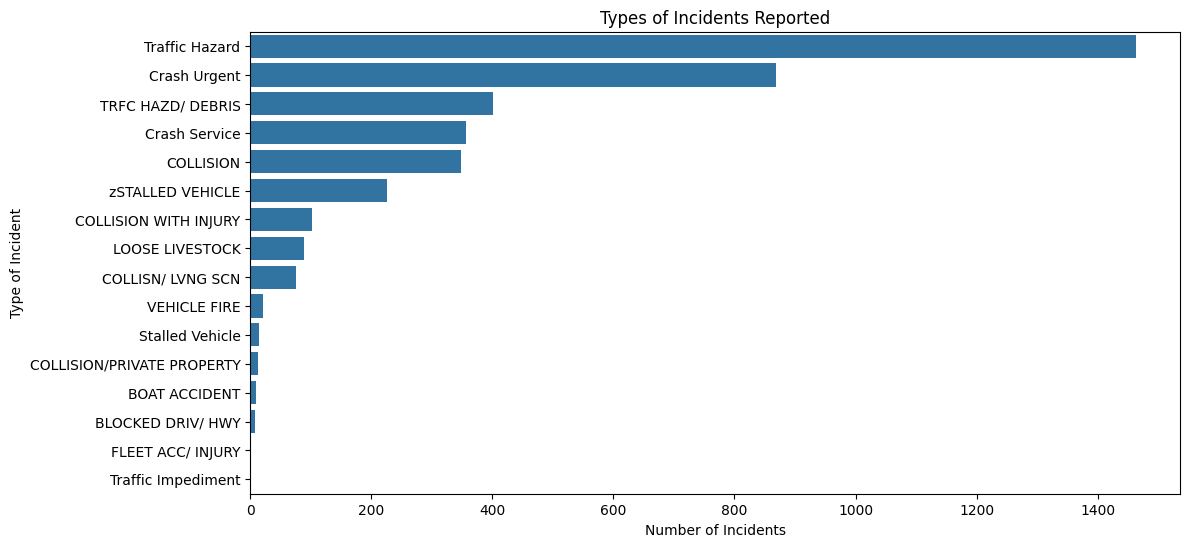

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Issue Reported', data=df, order=df['Issue Reported'].value_counts().index)
plt.title('Types of Incidents Reported')
plt.xlabel('Number of Incidents')
plt.ylabel('Type of Incident')
plt.show()


Incident Hotspots

<ipython-input-19-088ebe61e8cb>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


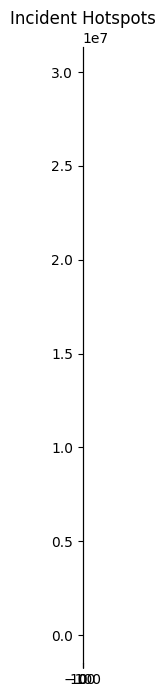

In [19]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Load base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot incident hotspots
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.title('Incident Hotspots')
plt.show()
